In [1]:
# Import needed libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:

# Using 'coin_id' is index & dropping the index to use as a regular column
df_market_data.reset_index(inplace=True)

# Df_market_data = DataFrame loaded with cryptocurrency data / first column is 'coin_id'
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.drop(columns=['coin_id']))
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns[1:])  

# Set 'coin_id' as index
scaled_df['coin_id'] = df_market_data['coin_id']
scaled_df.set_index('coin_id', inplace=True)


# Display first few rows of scaled DataFrame
print(scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

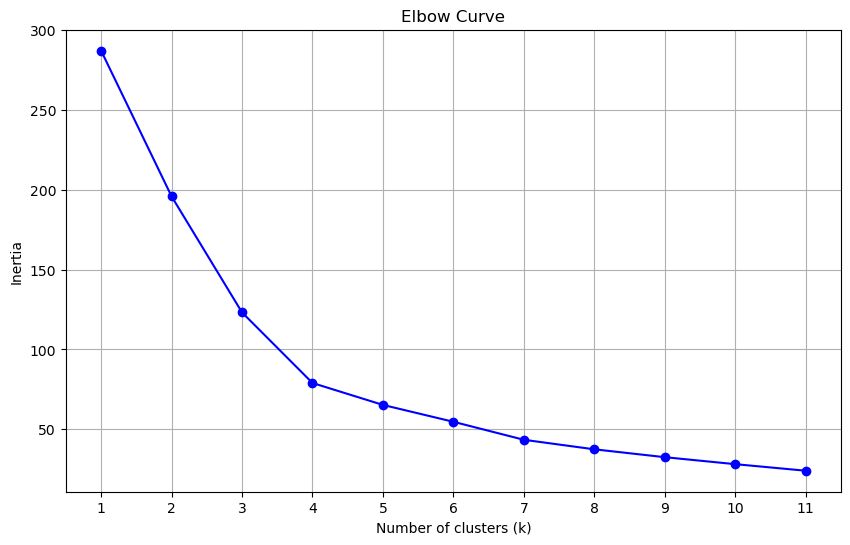

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# df_market_data = DataFrame with numeric columns

# Step 1: Select numeric columns and standardize the data
numeric_columns = df_market_data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Step 2: Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

# Step 3: Create an empty list to store the inertia values
inertia_values = []

# Step 4: Compute inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Step 5: Plot the Elbow curve to find the optimal value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hvplot.pandas  # Ensure you have hvplot installed: pip install hvplot

# Exclude non-numeric columns (like 'coin_id') from the DataFrame
numeric_columns = df_market_data.select_dtypes(include=[np.number])

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Determine the optimal number of clusters using the Elbow method or other techniques
best_k = 3  

# Initialize K-means with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit K-means model and predict clusters
clusters = kmeans.fit_predict(scaled_data)

# Assign cluster labels to the DataFrame
df_market_data['cluster'] = clusters

# Create a scatter plot using hvPlot
# Color map for clusters
color_map = {0: 'red', 1: 'blue', 2: 'green'} 

# Plot using hvPlot
scatter_plot = df_market_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    c=df_market_data['cluster'].map(color_map),
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    width=800,
    height=600
)

# Display the plot
scatter_plot


c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,_color,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# df_market_data = DataFrame with numeric columns

# Step 1: Select numeric columns and standardize the data
numeric_columns = df_market_data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Step 2: Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Step 3: Use PCA model with fit_transform to reduce to three principal components
pca_data = pca.fit_transform(scaled_data)

# Step 4: View the first five rows of the PCA DataFrame
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
print(df_pca.head())

# Step 5: Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance of PCA Components: {explained_variance}")

# Optionally, you can print the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print(f"Cumulative Explained Variance: {cumulative_variance}")


        PC1       PC2       PC3
0 -0.799811 -0.279774  0.704403
1 -0.392042 -0.286579  1.040620
2 -0.081059 -0.453920 -0.605187
3 -0.032961 -0.511382 -0.470160
4 -1.753298 -0.410916  2.368467
Explained Variance of PCA Components: [0.39797173 0.32325422 0.1699858 ]
Cumulative Explained Variance: [0.39797173 0.72122595 0.89121175]


In [10]:
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance of the Three Principal Components: {total_explained_variance}")


Total Explained Variance of the Three Principal Components: 0.8912117470391894


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8912117470391894

---

### Find the Best Value for k Using the PCA Data

INFO:root:Starting the PCA and KMeans clustering process.
INFO:root:Selecting numeric columns from df_market_data.
INFO:root:Numeric columns selected: ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'cluster']
INFO:root:Standardizing the data.
INFO:root:Data standardized.
INFO:root:Creating PCA model with 3 components.
INFO:root:Applying PCA transformation.
INFO:root:PCA transformation completed.
INFO:root:Converting PCA data to DataFrame.
INFO:root:PCA DataFrame head: 
        PC1       PC2       PC3
0 -0.799811 -0.279774  0.704403
1 -0.392042 -0.286579  1.040620
2 -0.081059 -0.453920 -0.605187
3 -0.032961 -0.511382 -0.470160
4 -1.753298 -0.410916  2.368467
INFO:root:Finding the best value for k using the PCA data.
INFO:root:Computing KMeans for k=1.
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py

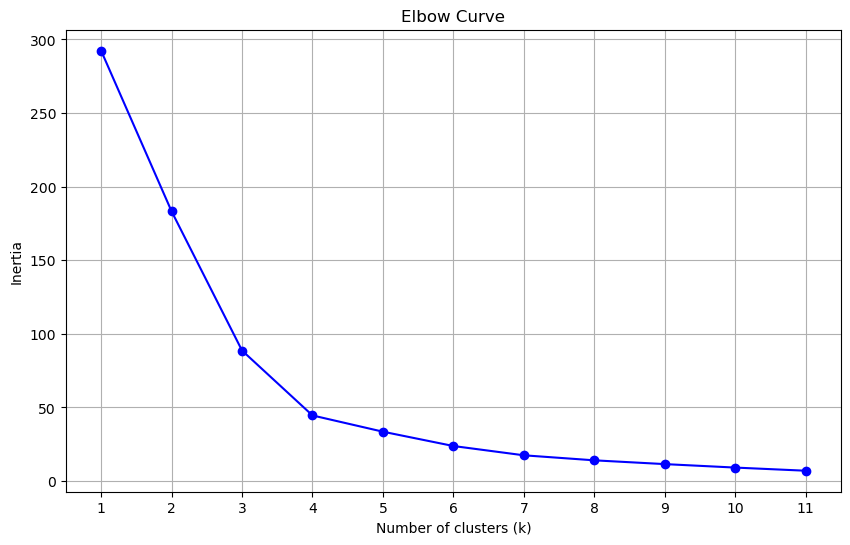

INFO:root:Elbow curve plotted successfully.


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import logging
import os

# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

logger.info("Starting the PCA and KMeans clustering process.")

try:
    # df_market_data is your DataFrame with numeric columns
    logger.info("Selecting numeric columns from df_market_data.")
    numeric_columns = df_market_data.select_dtypes(include=[np.number])
    logger.info(f"Numeric columns selected: {numeric_columns.columns.tolist()}")

    # Standardize the data
    logger.info("Standardizing the data.")
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_columns)
    logger.info("Data standardized.")

    # Create a PCA model instance and set n_components=3
    logger.info("Creating PCA model with 3 components.")
    pca = PCA(n_components=3)

    # Use PCA model with fit_transform to reduce to three principal components
    logger.info("Applying PCA transformation.")
    pca_data = pca.fit_transform(scaled_data)
    logger.info("PCA transformation completed.")

    # Convert PCA data to a DataFrame
    logger.info("Converting PCA data to DataFrame.")
    df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
    logger.info(f"PCA DataFrame head: \n{df_pca.head()}")

    # Find the best value for k using the PCA data
    logger.info("Finding the best value for k using the PCA data.")
    # Create a list with the number of k-values from 1 to 11
    k_values = range(1, 12)

    # Create an empty list to store the inertia values
    inertia_values = []

    # Create a for loop to compute the inertia with each possible value of k
    for k in k_values:
        logger.info(f"Computing KMeans for k={k}.")
        # Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42)

        # Fit the model to the PCA-transformed data
        kmeans.fit(df_pca)

        # Append the model.inertia_ to the inertia list
        inertia_values.append(kmeans.inertia_)
        logger.info(f"Inertia for k={k}: {kmeans.inertia_}")

    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        'k': list(k_values),
        'inertia': inertia_values
    }

    # Create a DataFrame with the data to plot the Elbow curve
    logger.info("Creating DataFrame for Elbow curve data.")
    elbow_df = pd.DataFrame(elbow_data)
    logger.info(f"Elbow DataFrame head: \n{elbow_df.head()}")

    # Plot a line chart with all the inertia values computed with the different values of k
    logger.info("Plotting the Elbow curve.")
    plt.figure(figsize=(10, 6))
    plt.plot(elbow_df['k'].values, elbow_df['inertia'].values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.xticks(list(k_values))
    plt.grid(True)
    plt.show()
    logger.info("Elbow curve plotted successfully.")

except Exception as e:
    logger.error(f"An error occurred: {e}")


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on the elbow curve analysis of the PCA-transformed data, the best value for k appears to be around 3 or 4. This is where the inertia starts to flatten out, indicating that adding more clusters does not significantly improve the variance explained.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the best k value found using PCA-transformed data can differ from the best k value found using the original data. PCA reduces the number of features while keeping as much variance as possible, so the optimal number of clusters (k) found using PCA-transformed data might capture the data patterns differently than the optimal k found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [12]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
best_k = 3  # Replace with the best k value determined from PCA analysis
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the K-Means model using the PCA data
kmeans.fit(pca_data)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_data)

# Print the resulting array of cluster values
print("Clusters assigned:", clusters)

# Create a copy of the DataFrame with the PCA data
df_pca_clustered = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered['cluster'] = clusters

# Display sample data
print(df_pca_clustered.head())

# Create a scatter plot using hvPlot
scatter_plot = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters with PCA Data'
)

# Show the scatter plot
scatter_plot


c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters assigned: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]
        PC1       PC2       PC3  cluster
0 -0.799811 -0.279774  0.704403        0
1 -0.392042 -0.286579  1.040620        0
2 -0.081059 -0.453920 -0.605187        0
3 -0.032961 -0.511382 -0.470160        0
4 -1.753298 -0.410916  2.368467        0


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [13]:
# df_market_data = DataFrame with numeric columns & already scaled

# Step 1: Initialize K-means model with the optimal value of k
optimal_k = 3  # optimal value of k from your Elbow curve

kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)

# Step 2: Fit the K-means model using the original scaled data
kmeans_original.fit(scaled_data)

# Step 3: Predict clusters for the original data
clusters_original = kmeans_original.predict(scaled_data)

# Step 4: Create a copy of the original DataFrame and add a new column with predicted clusters
df_original_clusters = df_market_data.copy()
df_original_clusters['cluster'] = clusters_original

# Step 5: Visualize clusters using hvPlot
import hvplot.pandas

# Scatter plot with hvPlot
df_original_clusters.hvplot.scatter(
    x='price_change_percentage_24h', y='price_change_percentage_7d',
    by='cluster', hover_cols=['coin_id'], 
    title=f'Cryptocurrency Clusters (k={optimal_k})'
)


c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\siobh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA before clustering with K-Means has several benefits:

Better Clusters: PCA finds the most important patterns, so the clusters are more distinct and easier to tell apart.

Faster Processing: With fewer features, the clustering process is faster and less complex, which is great for big datasets.

Easier Visualization: Reducing the number of features makes it simpler to see the clusters in 2D or 3D, making it easier to understand how cryptocurrencies group together.

Simpler Interpretation: PCA highlights the most important features, making it easier to understand why the clusters are formed.

Overall, using PCA before K-Means improves clustering by focusing on key patterns, speeding up the process, making visualization easier, and helping to understand the results better.

